In [20]:
# Import packages and libraries
%pip install scikit-learn
%pip install Jinja2
%matplotlib inline
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
# read the first 5000 rows of medical_transformed.csv
df = pd.read_csv('medical_transformed.csv', index_col=0)
df

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Complication_risk,...,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575,0,19.14,6,0,1,0,2,...,1,0,0,0,0,0,1,0,1,0
2,3,51,46805,0,18.94,4,1,1,0,3,...,0,1,1,0,0,0,0,0,1,0
3,3,53,14370,0,18.06,4,0,1,0,2,...,1,0,0,0,0,1,0,0,0,0
4,0,78,39741,0,16.58,4,0,0,1,2,...,1,0,1,0,0,0,1,0,0,0
5,1,22,1209,0,17.44,5,2,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,25,45967,0,16.98,4,1,1,0,2,...,0,1,0,0,0,1,1,0,1,0
9997,4,87,14983,1,18.18,5,0,1,0,2,...,0,1,0,0,0,1,1,0,0,0
9998,3,45,65917,1,17.13,4,0,1,0,3,...,0,0,0,0,1,0,0,0,0,0


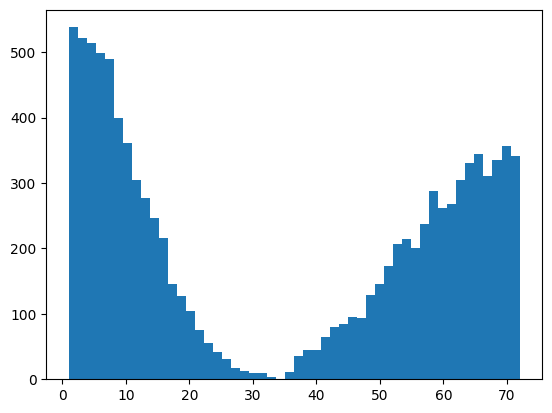

In [8]:
# create a histogram of the initial_days column
plt.hist(df['Initial_days'], bins=50)
plt.show()

--------------------

In [52]:
# muultiple regression model using df and ols and 'Initial_days' as the dependent variable and all other variables in the dataset as independent variables


X = df.drop('Initial_days', axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()

model_summary
# create a csv file with the model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     714.1
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:39:35   Log-Likelihood:                -40411.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9962   BIC:                         8.117e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  19.4602      2.467      7.889      0.000      14.625      24.295
Children                                0.0401      0.064      0.628      0.530      -0.085       0.165
Age                                     0.0035      0.007      0.521      0.603      -0.010       0.017
Income                              -3.442e-06   4.84e-06     -0.710      0.477   -1.29e-05    6.06e-06
ReAdmis                                46.4505      0.287    162.028      0.000      45.889      47.012
VitD_levels                            -0.0775      0.069     -1.130      0.259      -0.212       0.057
Doc_visits                             -0.1714      0.132     -1.297      0.195      -0.430       0.088
vitD_supp                               0.2924      0.220      1.331      0.183      -0.138       0.723
HighBlood                              -0.4475      0.281     -1.592      0.111      -0.998       0.103
Stroke                                 -0.2008      0.346     -0.581      0.561      -0.878       0.477
Complication_risk                      -0.3944      0.189     -2.084      0.037      -0.765      -0.023
Overweight                             -0.2090      0.304     -0.687      0.492      -0.805       0.387
Arthritis                               0.6649      0.288      2.305      0.021       0.100       1.230
Diabetes                                0.0132      0.310      0.042      0.966      -0.595       0.621
Hyperlipidemia                         -0.3959      0.292     -1.354      0.176      -0.969       0.177
BackPain                                0.3505      0.281      1.247      0.213      -0.201       0.902
Anxiety                                 0.5303      0.296      1.793      0.073      -0.049       1.110
Allergic_rhinitis                       0.4092      0.283      1.447      0.148      -0.145       0.963
Reflux_esophagitis                      0.4223      0.281      1.505      0.132      -0.128       0.972
Asthma                                  0.0406      0.305      0.133      0.894      -0.557       0.638
S_T_Admission                           0.4003      0.199      2.013      0.044       0.010       0.790
S_T_Treatment                           0.1342      0.183      0.732      0.464      -0.225       0.494
S_T_Visits                             -0.1296      0.169     -0.765      0.444      -0.462       0.202
S_Reliability                           0.3911      0.151      2.592      0.010       0.095       0.687
S_Options                               0.0093      0.159      0.058      0.953      -0.302       0.321
S_Hours_Treatment                      -0.2056      0.164     -1.254      0.210      -0.527       0.116
S_Staff                                -0.2466      0.154     -1.59

# Initial Regression Model based on all predictors

**Initial_days = 19.4602 + 0.0401(Children) + 0.0035(Age) - 3.442e-06(Income) + 46.4505(ReAdmis) - 0.0775(VitD_levels) - 0.1714(Doc_visits) + 0.2924(vitD_supp) - 0.4475(HighBlood) - 0.2008(Stroke) - 0.3944(Complication_risk) - 0.2090(Overweight) + 0.6649(Arthritis) + 0.0132(Diabetes) - 0.3959(Hyperlipidemia) + 0.3505(BackPain) + 0.5303(Anxiety) + 0.4092(Allergic_rhinitis) + 0.4223(Reflux_esophagitis) + 0.0406(Asthma) + 0.4003(S_T_Admission) + 0.1342(S_T_Treatment) - 0.1296(S_T_Visits) + 0.3911(S_Reliability) + 0.0093(S_Options) - 0.2056(S_Hours_Treatment) - 0.2466(S_Staff) - 0.1981(S_Active_Listening) + 0.1602(Area_Suburban) + 0.3731(Area_Urban) - 0.0263(Marital_Married) + 0.4302(Marital_Never Married) + 0.7953(Marital_Separated) + 0.2762(Marital_Widowed) - 0.0963(Gender_Male) - 0.2836(Gender_Nonbinary) - 1.6011(Initial_admin_Emergency Admission) - 0.2463(Initial_admin_Observation Admission)**




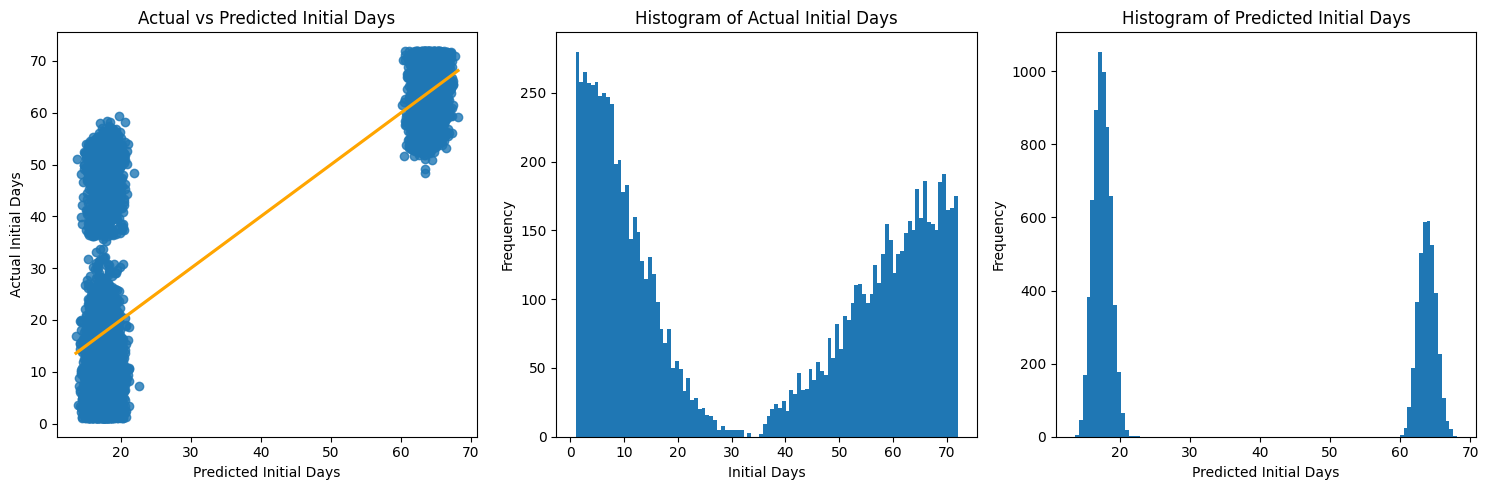

In [41]:
def dep_plot():
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot actual vs predicted initial days
    sns.regplot(x=predictions, y=Y, fit_reg=True, line_kws={'color':'orange'}, ax=axes[0])
    axes[0].set_xlabel('Predicted Initial Days')
    axes[0].set_ylabel('Actual Initial Days')
    axes[0].set_title('Actual vs Predicted Initial Days')

# Plot histogram of actual values
    axes[1].hist(Y, bins=100)
    axes[1].set_xlabel('Initial Days')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Histogram of Actual Initial Days')

# Plot histogram of predicted values
    axes[2].hist(predictions, bins=100)
    axes[2].set_xlabel('Predicted Initial Days')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('Histogram of Predicted Initial Days')

    plt.tight_layout()
    plt.show()

dep_plot()

- The plot of Actual vs Predicted day seems to miss much of the data in the middle,predicting at lower and higher values. The actual Initial Days histogram again shows it's bimodal distribution, suggesting two distinct groups or patterns within the data. The predicted Initial Days histogram clearly shows a large range of missing values in the middle, and is heavily concentrated at the low and high ends of the range.

In [53]:
# calculate RSE
mse = model.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)


Residual Standard Error (RSE): 13.792044580624435


## Initial Model Fit:

- The R-squared is 0.726, suggesting that approximately 72.6% of the variability in `Initial_days` may be explained by the model, which in combination with the almost identical Adj. R-squared of 0.725 indicating a good fit with initial model.
- The F-statistic is 714.14 with a Prob (F-statistic) of 0.00, *suggesting* that the model is statistically significant overall.
- The AIC 8.090e+04 and BIC 8.117e+04 are very similar, suggesting suggests that both are close in their evaluation of model complexity. These will be re-examined in the reduced model to see if they are lowered. 
- Residual Standard Error calculation (RSE): 13.79 (https://stackoverflow.com/questions/63333999/residual-standard-error-of-a-regression-in-python) `Initial_days` ranges from 1 to 72 days. An RSE of 13.79 days represents over 19% (13.792 / 72 * 100) of the total range. This suggests that, on average, the model's predictions for length of stay can deviate from the actual values by up to 13.792 days. This seems significant in this context and indicates room for improvement.

(middleton slides II https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d)

Variables.
Many predictor variables have high t-values and low p-values (P>|t|), indicating that they are statistically significant. Of note is the `ReAdmis` feature, it has a very low p-value and a highly significant coefficient (46.4505), suggesting a strong association with `Initial_days`
However, variables such as Children, Age, Income, and others have high p-values, indicating that they might not be significant predictors of `Initial_days` in the presence of other variables.
The const coefficient (y-intercept) is 19.5835, which represents the expected value of `Initial_days` when all other predictors are at zero.

- Overall, even though there are some summary statistics points to a reliable model, we should be skeptical with the warning about potential multicollinearity, and the plot of the actual vs predicted values not accounting for much of the data. There are several things we should check. 

Issues:
The note on multicollinearity "[2] The condition number is large, 8.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems." indicates that there might be high correlation between some predictors. This needs to be investigated. Checking the residuals and Variance inflation factor (VIF) analysis can help to identify and highly correlated predictors.

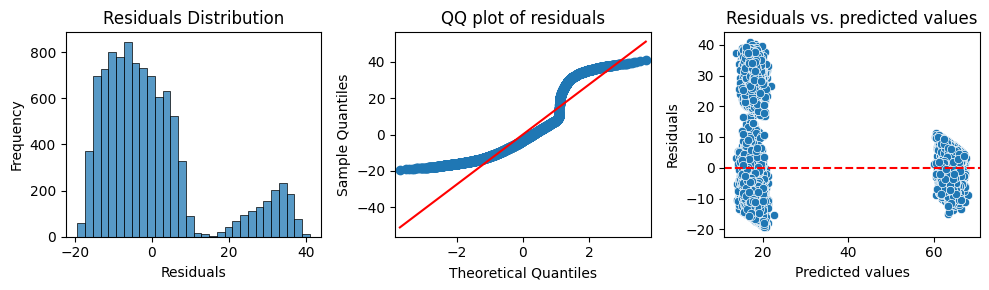

In [38]:
# Calculate the residuals
residuals = Y - predictions

# Plot the residuals
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Residuals Distribution
sns.histplot(residuals, bins=30, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals Distribution')

# QQ plot of residuals
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals")

plt.axhline(y=0, color='red', linestyle='--') 
sns.scatterplot(x=predictions, y=residuals, ax=axes[2])
axes[2].set_xlabel("Predicted values")
axes[2].set_ylabel("Residuals")
axes[2].set_title("Residuals vs. predicted values")

plt.tight_layout()
plt.show()



- Ideally, one would like to see a normal distribution centered around zero for the residual distribution, but this**histogram** indicates a slightly bimodal distribution that is skewed to the right, with a tail that grows slightly positive values. 
- The **Q-Q plot** shows that the residuals are not normally distributed, as the points do not fall along the straight line. This plot required research to interpret as I was not familiar with it. From https://seankross.com/2016/02/29/A-Q-Q-Plot-Dissection-Kit.html: "*The points in Q-Q plot then cross below the blue line indicating that the actual quantiles that are close to zero are farther from zero than they should be theoretically. At the center of the theoretical distribution there are no data in the actual dataset, and therefore there is no point in the Q-Q plot at (0, 0). The upper half of the Q-Q plot is a reflection across X and Y of the bottom half.*" The author also suggest this is the results of a residual distribution that is similar to the one I have. Additionally, the center of the theoretical distribution indeed did not have any data points as mentioned above.
- According to https://indhumathychelliah.com/2021/08/03/everything-to-know-about-residuals-in-linear-regression/ The residuals (errors) should be scattered randomly above and below the zero line across the entire range of predicted value and There should be no discernible pattern in the scatter plot of residuals. This is not the case in my scatter plot of residuals. Indicating that the model is not a good fit for the data.


 Feature Selection Techniques will be used to try and create a better performing, reduced model. VIF analysis will be used to identify highly correlated predictors. 

In [42]:
# perform VIF analysis to check for multicollinearity
X = add_constant(X)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif.sort_values(by='VIF', ascending=False)

,variables,VIF
0,const,319.858939
20,S_T_Admission,2.213926
21,S_T_Treatment,1.894971
33,Marital_Widowed,1.631655
30,Marital_Married,1.628373
31,Marital_Never Married,1.619690
32,Marital_Separated,1.617689
22,S_T_Visits,1.608013
25,S_Hours_Treatment,1.506889
37,Initial_admin_Observation Admission,1.499497


From the VIF analysis, most variables have VIF values well below 5, indicating no significant multicollinearity among them, which is surprising given the message from the model summary: *"[2] The condition number is large, 8.89e+05. This might indicate that there are strong multicollinearity or other numerical problems."* The highest VIF values observed for `S_T_Admission`, `S_T_Treatment`, and `marital` status categories, but even these do not exceed the threshold of 5, suggesting moderate correlation at most. 

Given the generally low VIF values, the summary statistics mentioned above the suggest a good model fit, the residuals and Q-Q plots, and the actual and predicted values, something less obvoius must be wrong with the initial model. It is also important to keep in mind the bimodal distribution of the actual `Initial_days` values, which may be contributing to the model's poor performance due to the violation of the assumption of normality.

One option is to try to transform the `Initial_days` variable to make it more normally distributed. This could involve taking the log of the variable, or splitting the data into two groups based on the bimodal distribution and creating separate models for each group. However, this would likely be complex at this point in the process and may not be necessary if a reduced model can be created that performs better than the initial model. Therefore, before that is attempted, I will employ what *domain knowledge* I have regarding the variable and use a *correlation matrix* to help identify pairwise relationships between the independent variable. In this context, perhaps a better model can be created by removing some of the predictors that are not significantly associated with `Initial_days` and may be contributing to the model's poor performance.




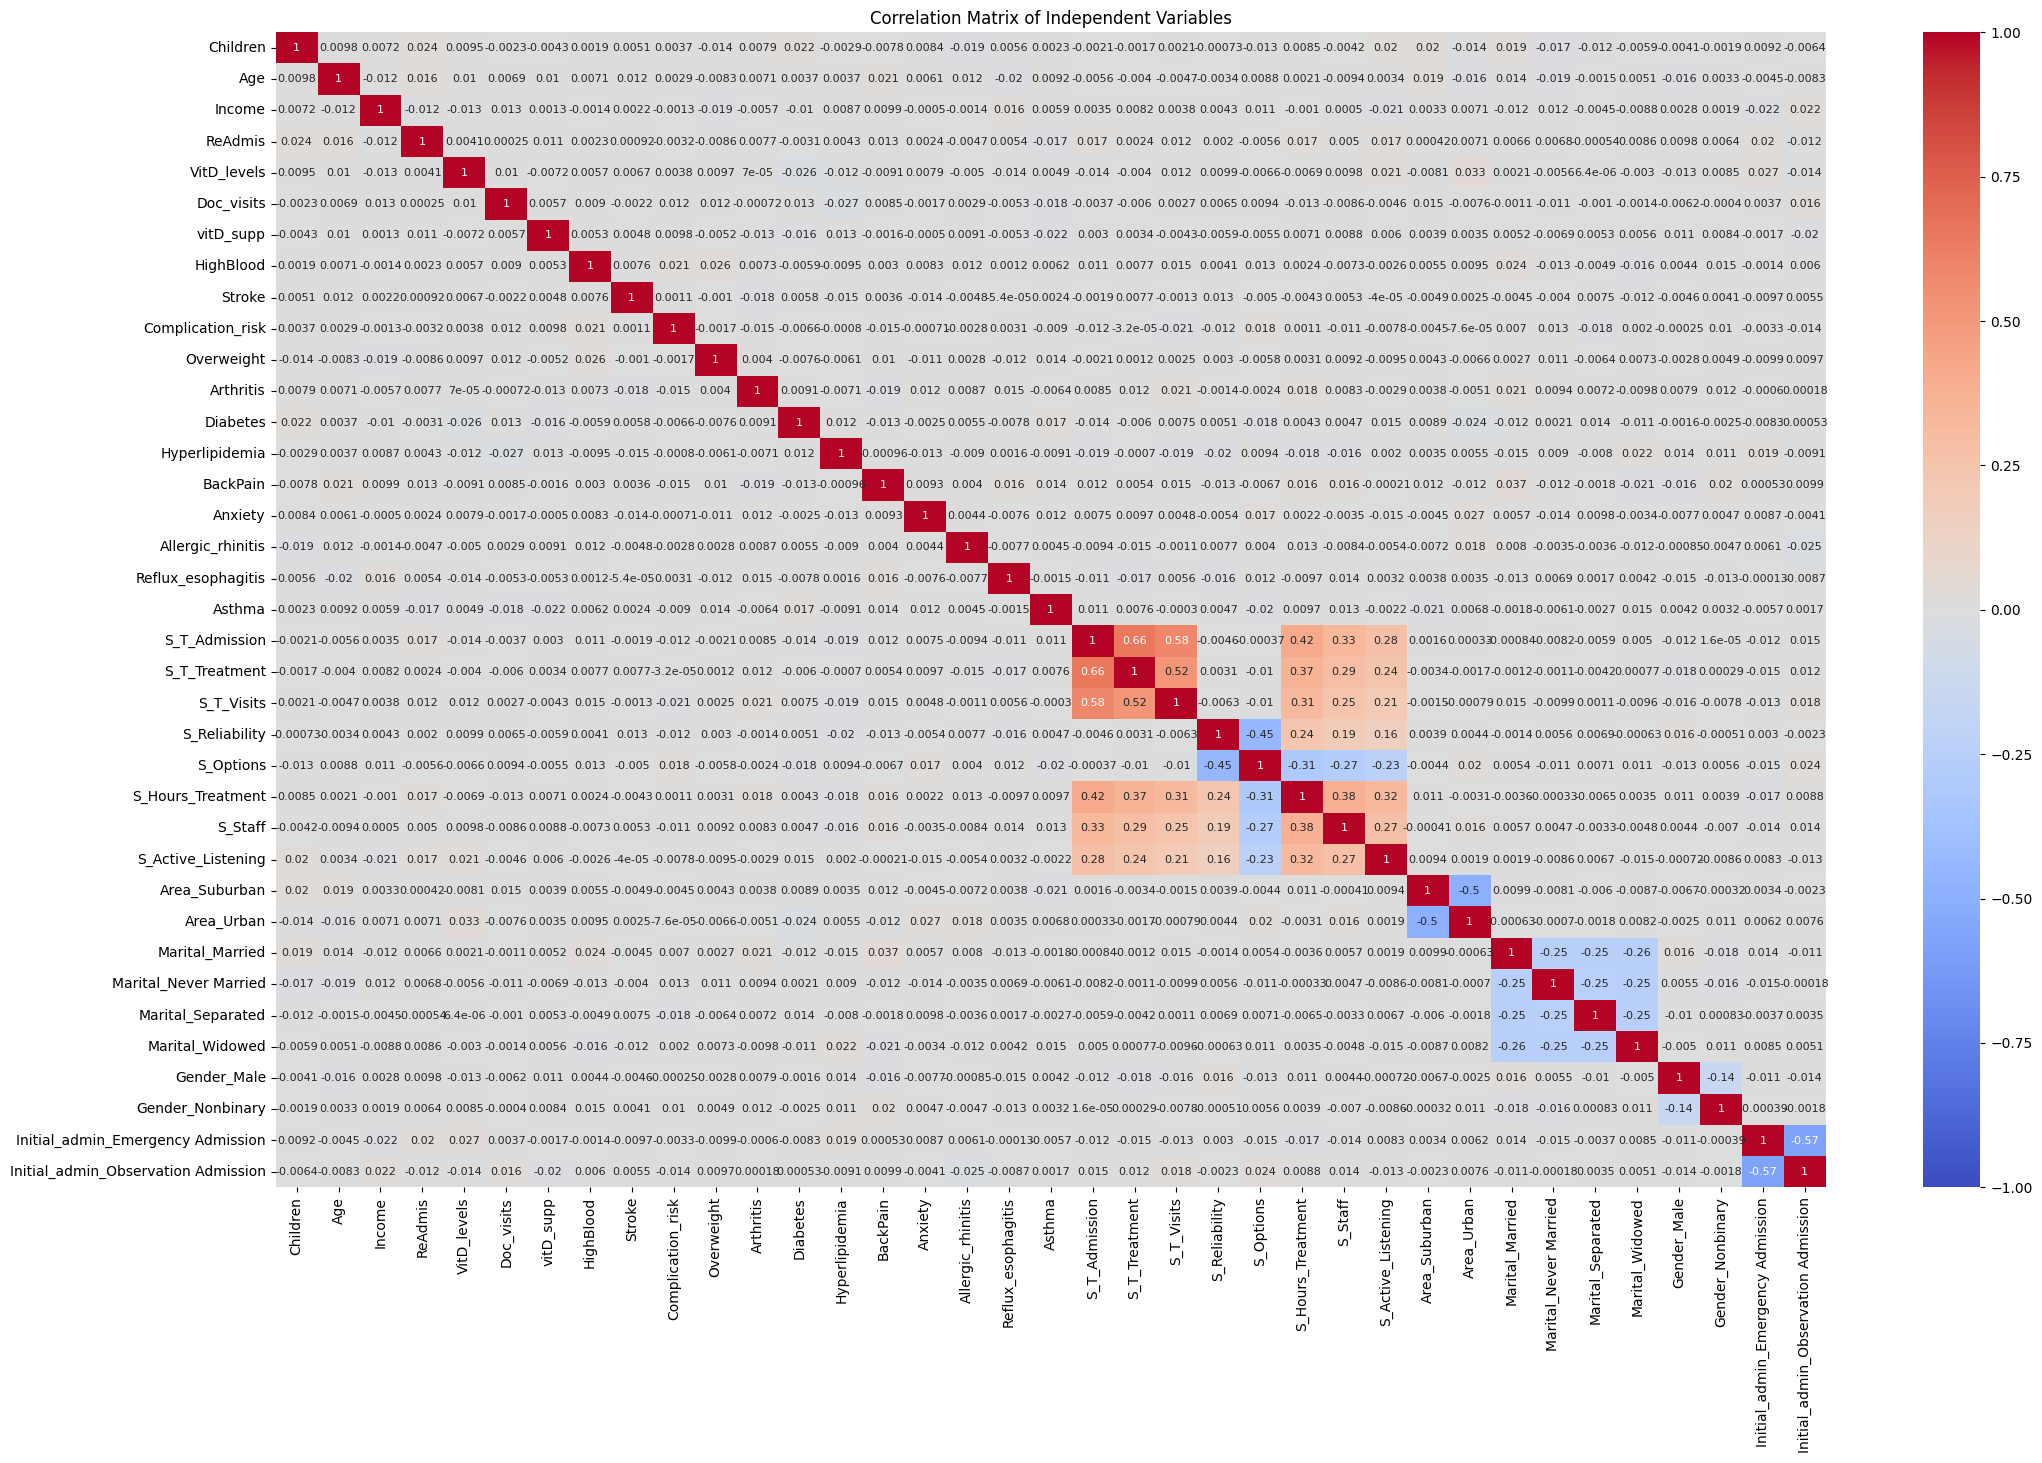

In [54]:
# Define and assign a value to the variable "corr_matrix"
corr_matrix = df.drop('Initial_days', axis=1).corr()

# Set the figure size
plt.figure(figsize=(25, 15))

# Plot the correlation matrix with annotated values and adjusted font size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 8}, vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Matrix of Independent Variables')

# Show the plot
plt.show()


- The correlation matrix shows that most of the variables that contain any correlation wit each other are the survey items, marital status, area, and initial admission. These would be interesting to explore further but in the context of this analyst, are not as useful as the other predictors which are largely health and biological factors and importantly, readmission status. The survey items are likely to be highly correlated with each other, and subjective feedback worthy of their own separate analyses, but here may be getting in the way of the model.Marital status, in my personal experience, has never been a factor health care providers consider except when contacting family members. I feel that these are good candidates for removal from the model. 

In [78]:
#df = df.drop(['S_T_Admission', 'S_T_Treatment', 'Marital_Widowed', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'S_T_Visits', 'S_Hours_Treatment', 'S_Reliability', 'S_Staff','S_Options', 'Area_Urban','Initial_admin_Observation Admission', 'S_Active_Listening', 'Area_Suburban','Initial_admin_Emergency Admission'], axis=1)
df


,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Complication_risk,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Gender_Male,Gender_Nonbinary
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575,0,19.14,6,0,1,0,2,...,1,0,1,1,1,0,1,10.59,1,0
2,3,51,46805,0,18.94,4,1,1,0,3,...,0,0,0,0,0,1,0,15.13,0,0
3,3,53,14370,0,18.06,4,0,1,0,2,...,1,0,0,0,0,0,0,4.77,0,0
4,0,78,39741,0,16.58,4,0,0,1,2,...,0,0,0,0,0,1,1,1.71,1,0
5,1,22,1209,0,17.44,5,2,0,0,1,...,0,1,0,0,1,0,0,1.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,25,45967,0,16.98,4,1,1,0,2,...,0,0,0,1,0,1,0,51.56,1,0
9997,4,87,14983,1,18.18,5,0,1,0,2,...,1,0,0,0,0,0,1,68.67,1,0
9998,3,45,65917,1,17.13,4,0,1,0,3,...,0,0,0,1,1,0,0,70.15,0,0


In [79]:
df.to_csv('medical_transformed_drop1.csv', index='CaseOrder')

In [76]:
# read in the new csv file
df = pd.read_csv('medical_transformed_drop1.csv', index_col=0)
df

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Complication_risk,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Gender_Male,Gender_Nonbinary
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575,0,19.14,6,0,1,0,2,...,1,0,1,1,1,0,1,10.59,1,0
2,3,51,46805,0,18.94,4,1,1,0,3,...,0,0,0,0,0,1,0,15.13,0,0
3,3,53,14370,0,18.06,4,0,1,0,2,...,1,0,0,0,0,0,0,4.77,0,0
4,0,78,39741,0,16.58,4,0,0,1,2,...,0,0,0,0,0,1,1,1.71,1,0
5,1,22,1209,0,17.44,5,2,0,0,1,...,0,1,0,0,1,0,0,1.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,25,45967,0,16.98,4,1,1,0,2,...,0,0,0,1,0,1,0,51.56,1,0
9997,4,87,14983,1,18.18,5,0,1,0,2,...,1,0,0,0,0,0,1,68.67,1,0
9998,3,45,65917,1,17.13,4,0,1,0,3,...,0,0,0,1,1,0,0,70.15,0,0


### G & H: References

- Western Governors University. (2023, December 21). D207 - Medical_clean Dataset. Retrieved from https://lrps.wgu.edu/provision/227079957

- Western Governors University IT Department. (2023). R or Python? How to decide which programming language to learn. Retrieved from https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html#

- Datacamp. (2023, December 12). D207 - Exploratory Data Analysis. Retrieved from https://app.datacamp.com/learn/custom-tracks/custom-d207-exploratory-data-analysis 

- Sewell, Dr. (2023). WGU D207 Exploratory Data Analysis [Webinars]. WGU Webex. Accessed December, 2023. https://wgu.webex.com/webappng/sites/wgu/meeting/info/c4aca2eac546482880f1557c938abf40?siteurl=wgu&MTID=me73470c2eac9e863c6f47a3d5b6d2f26 

- Seaborn Developers. (2023). seaborn.scatterplot — seaborn 0.11.2 documentation. Retrieved December 22, 2023, from https://seaborn.pydata.org/generated/seaborn.scatterplot.html

OLD ABOVE _ DELETE?KEEP? as needed.

- Statology. (n.d.). *The Five Assumptions of Multiple Linear Regression*. Statology. Retrieved March 10, 2024, from www.statology.org/multiple-linear-regression-assumptions/

- Pennsylvania State University. (n.d.). *5.3 - The Multiple Linear Regression Model*. STAT 501. Retrieved March 10, 2024, from online.stat.psu.edu/stat501/lesson/5/5.3

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html



In [71]:
# manage memory by using gc.collect() to clear memory
import gc
gc.collect()


0

# Limitations

Beware of the following with your regression analysis:

Overfitting can occur due to limited data points.

Multicollinearity occurs when high association (correlation) with other IVs.

P-values can be unreliable and coefficients swing wildly

Check for pairwise correlations and high VIF (> 10)

Tune your model with as many variables as practical. Forward, backward, stepwise
    regression based on AIC, BIC, etc.
ppoint 5 https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ERPQ0YpiQktOl-7YyAVnfLMBR5qeBh2cSv61VaJqe_aHKg?e=FjPhPz

# Errata n notes

I'm wrapping up task 1, and my research question is 'what factors influence the total charge a patient receives'. Total charge has a bimodal distribution that I did a log transform on which helped tremendously. Regarding my final reduced model, the RSE is pretty good, both residual normality and homoscedasticity are mostly there. Both have slight variance from expectations around the tails. For fun I decided to re run my code but filtered my data for patients staying less than a month and it improved my RSE, normality and homoscedasticity. Should I change my research question or keep it broad and just explain the limitations of outlier patients?


